# Diffraction

##### Libraries

In [55]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.special import jv

##### Constants

In [37]:
I0 = 1
N = 1000
Z = 1
lamb_list = np.array([668, 613, 575,540, 505, 470, 425])*1e-9 #[meter]
b = 14e-6
a = 55e-6
colors = np.array(['#FF0000','#FF7F00','#FFFF00','#00FF00','#0000FF','#4B0082','#9400D3'])

##### Funksjoner

In [110]:
def calc_Ip_slit(ax,X,Z,lamb):
    Ip = I0*np.sinc(ax*X/(Z*lamb))**2#numpys sinc har med faktoren pi automatisk, og attenuasjonen har jeg ikke tatt med
    return Ip

def slit_diffraction(ax,Z,lamb,i,axes): #siste argumentene er for å få riktig farge på riktig bølgelengde lambda
    limits = 1.5*Z*lamb/ax
    Xs = np.linspace(-limits,limits,N)
    Image_plane = calc_Ip_slit(ax,Xs,Z,lamb)
    axes.plot(Xs,Image_plane,color = colors[i])
    
def calc_multiple_Ip_slit(a,b,Y,Z,lamb,Nslits): #N=2 gjør denne funksjonen ekvivalent til double slit diffraction. 
    alpha = np.pi*a*Y/(lamb*Z)
    beta = b*Y/(lamb*Z)
    Ip = I0*np.sinc(beta)**2*(np.sin(Nslits*alpha)/np.sin(alpha))**2
    return Ip
    
def multiple_slit_diffraction(a,b,Z,lamb,Nslits):
    limitsx = Z*lamb/(a)*10
    Ys = np.linspace(-limitsx,limitsx,N)
    Image = calc_multiple_Ip_slit(a,b,Ys,Z,lamb,Nslits)
    return Ys, Image

def calc_Ip_square(ax,ay,X,Y,Z,lamb):
    Ip = I0*np.sinc(ax*X/(Z*lamb))**2*np.sinc(ay*Y/(Z*lamb))**2
    return Ip

def square_diffraction(ax,ay,Z,lamb):
    limitsx = Z*lamb/(a)
    limitsy = Z*lamb/(a)
    Xs = np.linspace(-limitsx,limitsx,N)
    Ys = np.linspace(-limitsy,limitsy,N)
    xv,yv = np.meshgrid(Xs,Ys)
    Image_plane = calc_Ip_square(ax,ay,xv,yv,Z,lamb)
    plt.imshow(Image_plane,cmap='hot',vmax = 0.1)
    
def calc_Ip_circle(D,X,Y,Z,lamb):
    q = np.sqrt(X**2 + Y**2)
    gamma = q*D*np.pi/(Z*lamb)
    Ip = I0*(2*jv(1,gamma)/gamma)**2
    return Ip
    
def circular_diffraction(D,Z,lamb,size_mult = 1):
    limitsx = Z*lamb/D*size_mult
    limitsy = Z*lamb/D*size_mult
    Xs = np.linspace(-limitsx,limitsx,N)
    Ys = np.linspace(-limitsy,limitsy,N)
    xv,yv = np.meshgrid(Xs,Ys)
    Image_plane = calc_Ip_circle(D,xv,yv,Z,lamb)
    plt.imshow(Image_plane,cmap = "hot")

##### Oppgave 1: Single slit

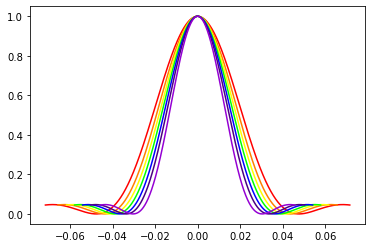

In [54]:
fig,axes= plt.subplots()
for i in range(7):
    slit_diffraction(b,Z,lamb_list[i],i,axes)

Ser at når bølgelengden øker, så øker fringedistancen

##### Oppgave 2: Double slit


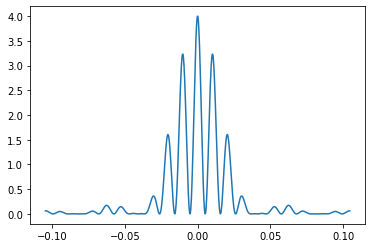

In [40]:
Ys, Image = multiple_slit_diffraction(a,b,Z,lamb_list[2],2)
plt.plot(Ys,Image)
plt.show()

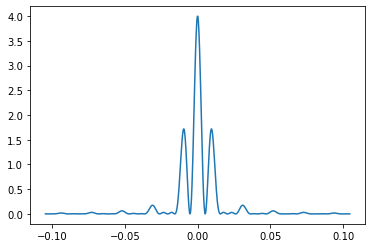

In [41]:
Ys, Image = multiple_slit_diffraction(a,2*b,Z,lamb_list[2],2)
plt.plot(Ys,Image)
plt.show()

Fra disse to figurene ser vi når slit-width b øker, så reduseres bredden på carrier-bølgen.

##### Oppgave 3 - Several slits

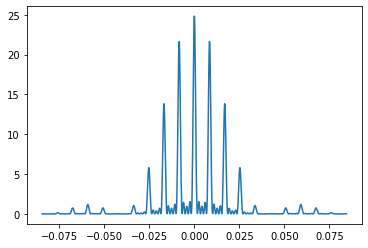

In [42]:
b = 14e-6
a = 68e-6

Ys, Image = multiple_slit_diffraction(a,b,Z,lamb_list[2],5)
plt.plot(Ys,Image)
plt.show()

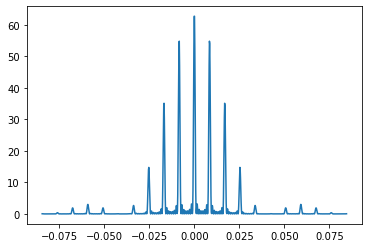

In [43]:
Ys,Image = multiple_slit_diffraction(a,b,Z,lamb_list[2],8)
plt.plot(Ys,Image)
plt.show()

##### Oppgave 4: Interferere slit distance / slit width ut ifra graf

Har $\alpha = \frac{\pi a Y}{\lambda Z}$ og $\beta = \frac{\pi b Y}{\lambda Z}$ i den analytiske løsningen 
$I = I_0 sinc{\beta} \frac{\sin{ 2 \alpha}}{\sin{\alpha}}$, hvor a = seperasjon mellom slits, b = slit width, Z = distanse mellom slits og image-plane, Y er koordinatet på image-plane det dukker opp et mønster langs.

Sinc har nullpunkt i $\beta = \pm \pi$.

I figur 1:

Ser ut som punktet $\beta =  \pi$., så er interferensfaktoren mellom et toppunkt altså er $\alpha = m \pi$ der m er antall topper fra, men ikke med, den i Y = 0. Teller m=3 Dette betyr at vi har $\alpha = 3 \pi = 3\beta$, som betyr at vi får:

$\frac{\alpha}{\beta} =\frac{\frac{\pi a Y}{\lambda Z}}{\frac{\pi b Y}{\lambda Z}} = \frac{a}{b} = \frac{1}{3}$

I figur 2: 

Teller m = 5m som betyr at $\frac{\alpha}{\beta} =\frac{\frac{\pi a Y}{\lambda Z}}{\frac{\pi b Y}{\lambda Z}} = \frac{a}{b} = \frac{1}{5}$

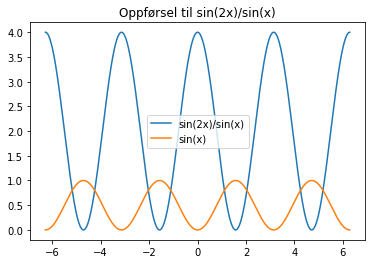

In [44]:
xs = np.linspace(-2*np.pi,2*np.pi,1000)
ys = np.array([(np.sin(2*x)/np.sin(x))**2 for x in xs])
ys1 = np.array([np.sin(x)**2 for x in xs])
plt.title("Oppførsel til sin(2x)/sin(x)")
plt.plot(xs,ys,label = "sin(2x)/sin(x)")
plt.plot(xs,ys1,label = "sin(x)")
plt.legend()
plt.show()

Ser her at normalisert sin(2x)/sin(x) = sin(x+pi/2)

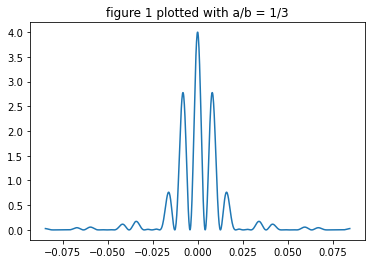

In [45]:
Ys, Image = multiple_slit_diffraction(a,a/3,Z,lamb_list[2],2)
plt.title("figure 1 plotted with a/b = 1/3")
plt.plot(Ys,Image)
plt.show()

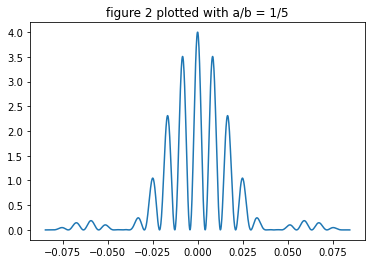

In [46]:
Ys, Image = multiple_slit_diffraction(a,a/5,Z,lamb_list[2],2)
plt.title("figure 2 plotted with a/b = 1/5")
plt.plot(Ys,Image)
plt.show()

Disse plottene ser ut til å være omtrent identiske til de fra oppgaven, som er et godt tegn.

##### Voluntary problem: Circular & rectangular apertures

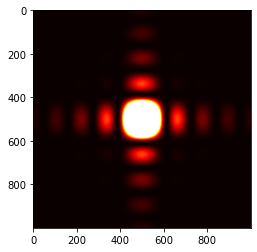

In [93]:
D = 0.3e-3 #[meter]

square_diffraction(D,D,Z,lamb_list[2])

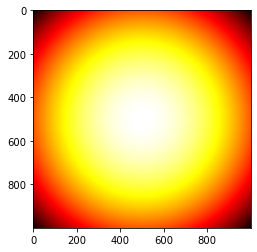

In [109]:
circular_diffraction(D,Z,lamb_list[2],size_mult = 0.1)

Dette sirkulære bildet har ingen tydelig fringe-mønster. Må ses mer på!